In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/msc')
os.getcwd()

'/content/drive/MyDrive/msc'

In [3]:
import pandas as pd
import numpy as np

In [33]:
apollohosp=pd.read_csv('apollohosp_expsetup2.csv')
apollohosp.head()

,Date,FibonacciLevels,PBDT,RSI,macd,Volume,EPS (Rs),CI
0,2016-01-01,1416.966919,73.0,64.077246,27.112706,107024,5.23,56.635556
1,2016-01-04,1413.055129,73.0,60.422239,25.887594,121226,5.23,59.080965
2,2016-01-05,1464.590068,73.0,64.203471,26.068095,667535,5.23,52.770482
3,2016-01-06,1447.281599,73.0,59.805908,24.886641,233987,5.23,57.806178
4,2016-01-07,1417.944733,73.0,44.991438,19.098288,184861,5.23,54.026040


In [34]:
data = apollohosp.filter(['FibonacciLevels'])

dataset =data.values

training_data_len = int(np.ceil(len(dataset)*0.95))

training_data_len

1387

In [35]:
dataset

array([[1416.96691868],
       [1413.05512888],
       [1464.59006789],
       ...,
       [5935.39990234],
       [5858.        ],
       [5829.95019531]])

In [36]:
# Scaling the data 
from sklearn.preprocessing import MinMaxScaler

scaler_apollohosp=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler_apollohosp.fit_transform(dataset)

scaled_data

array([[0.10289505],
       [0.10211839],
       [0.11235031],
       ...,
       [1.        ],
       [0.98463276],
       [0.97906366]])

In [37]:
 # Creating XY_splits
train_data = scaled_data[0:int(training_data_len),:]
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(X_train,y_train)

X_train,y_train = np.array(X_train),np.array(y_train)

[array([0.10289505, 0.10211839, 0.11235031, 0.10891383, 0.10308918,
       0.09688596, 0.09514826, 0.08821699, 0.09257574, 0.09235245,
       0.09309023, 0.08993521, 0.09726456, 0.10017684, 0.09055651,
       0.09551715, 0.09899256, 0.0910128 , 0.08958575, 0.09648797,
       0.10697227, 0.11765073, 0.11237948, 0.1147384 , 0.10521517,
       0.10716644, 0.10382694, 0.10437056, 0.10501134, 0.09978853,
       0.09046916, 0.09590549, 0.08755684, 0.09726453, 0.09629377,
       0.09474055, 0.09727427, 0.09821593, 0.09978859, 0.09843922,
       0.09660443, 0.10798185, 0.12151441, 0.11286483, 0.10056518,
       0.09589575, 0.09439102, 0.09823533, 0.09802174, 0.09849743,
       0.09510943, 0.08716853, 0.09171175, 0.09348826, 0.09629379,
       0.09864508, 0.09675369, 0.09579822, 0.08828143, 0.08479113])] [0.08421593018329729]
[array([0.10289505, 0.10211839, 0.11235031, 0.10891383, 0.10308918,
       0.09688596, 0.09514826, 0.08821699, 0.09257574, 0.09235245,
       0.09309023, 0.08993521, 0.097

In [38]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [39]:
X_train.shape,y_train.shape

((1327, 60, 1), (1327,))

In [40]:
import tensorflow as tf

In [41]:
opt_lr=8*(10**(-5))
opt_lr

8e-05

In [43]:
# Building Double Layer LSTM model

#Setting random seed
tf.random.set_seed(42)

# model
model_lstm = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
      tf.keras.layers.LSTM(60,return_sequences=True),
      tf.keras.layers.LSTM(60),
      tf.keras.layers.Dense(1)
])

# Compile model
model_lstm.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr),
                   metrics='mae')

# Train the model
model_lstm.fit(X_train,y_train,epochs=40,verbose=0)

In [44]:
 # Creating XY_splits
test_data = scaled_data[int(training_data_len)-60:,:]
X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [45]:
#y_test_norm= scaler.fit_transform(y_test)

In [46]:
y_pred_test = model_lstm.predict(X_test)
y_pred_test_real = scaler_apollohosp.inverse_transform(y_pred_test)

In [48]:
y_test.shape,y_pred_test_real.shape

((72, 1), (72, 1))

In [49]:
rmse = np.sqrt(np.mean((y_pred_test-y_test_norm)**2))
rmse

0.3887308395402407

In [50]:
mape =np.mean(np.abs((y_test_norm-y_pred_test)/len(y_test_norm)))*100
mape

0.5022121655382361

In [51]:
import matplotlib.pyplot as plt

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
datadf = apollohosp.filter(['Date','FibonacciLevels'])
datadf.head()

,Date,FibonacciLevels
0,2016-01-01,1416.966919
1,2016-01-04,1413.055129
2,2016-01-05,1464.590068
3,2016-01-06,1447.281599
4,2016-01-07,1417.944733


<Figure size 720x576 with 0 Axes>

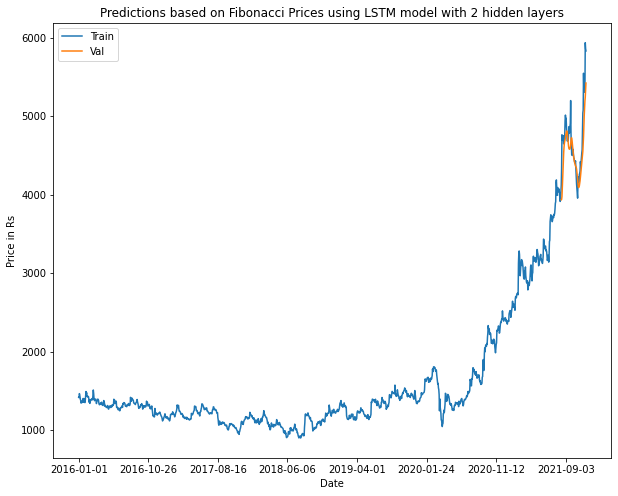

In [54]:
# Plot the data
train = datadf[:training_data_len]
valid = datadf[training_data_len:]
train = train.set_index('Date')
valid = valid.set_index('Date')

valid['Predictions'] = y_pred_test_real
finaldf = pd.concat([train,valid],axis=0)
# Visualize the data
plt.figure(figsize=(10,8))
finaldf[['FibonacciLevels','Predictions']].plot(figsize=(10,8))
plt.title('Predictions based on Fibonacci Prices using LSTM model with 2 hidden layers')
plt.xlabel('Date')
plt.ylabel('Price in Rs')
plt.legend(['Train','Val','Predictions'],loc='upper left')


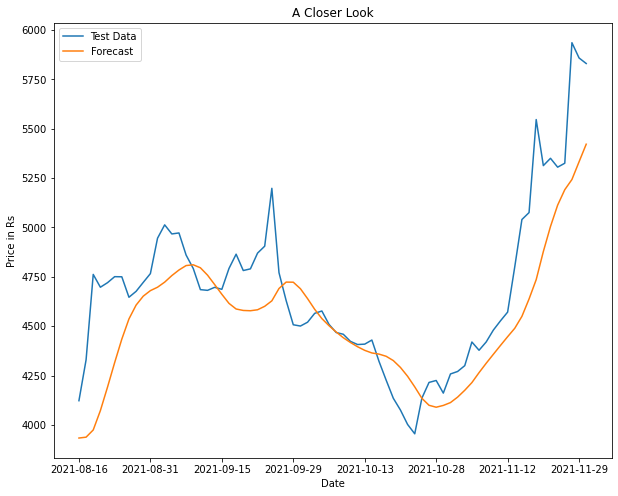

In [55]:
valid[['FibonacciLevels','Predictions']].plot(figsize=(10,8))
plt.xlabel('Date')
plt.title('A Closer Look')
plt.ylabel('Price in Rs')
plt.legend(['Test Data','Forecast'],loc='upper left')